# Imports


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt


# Leitura dos dados

In [2]:
dataset = pd.read_csv('dataset/House_Rent_Dataset.csv')
dataset.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Pré-processamento

## Análise exploratória dos dados

### Informações gerais dos dados

In [3]:
dataset.shape

(4746, 12)

In [4]:
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
dataset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
print(f"Duplicados: {int(dataset.duplicated().sum())}")

Duplicados: 0


### Gráficos

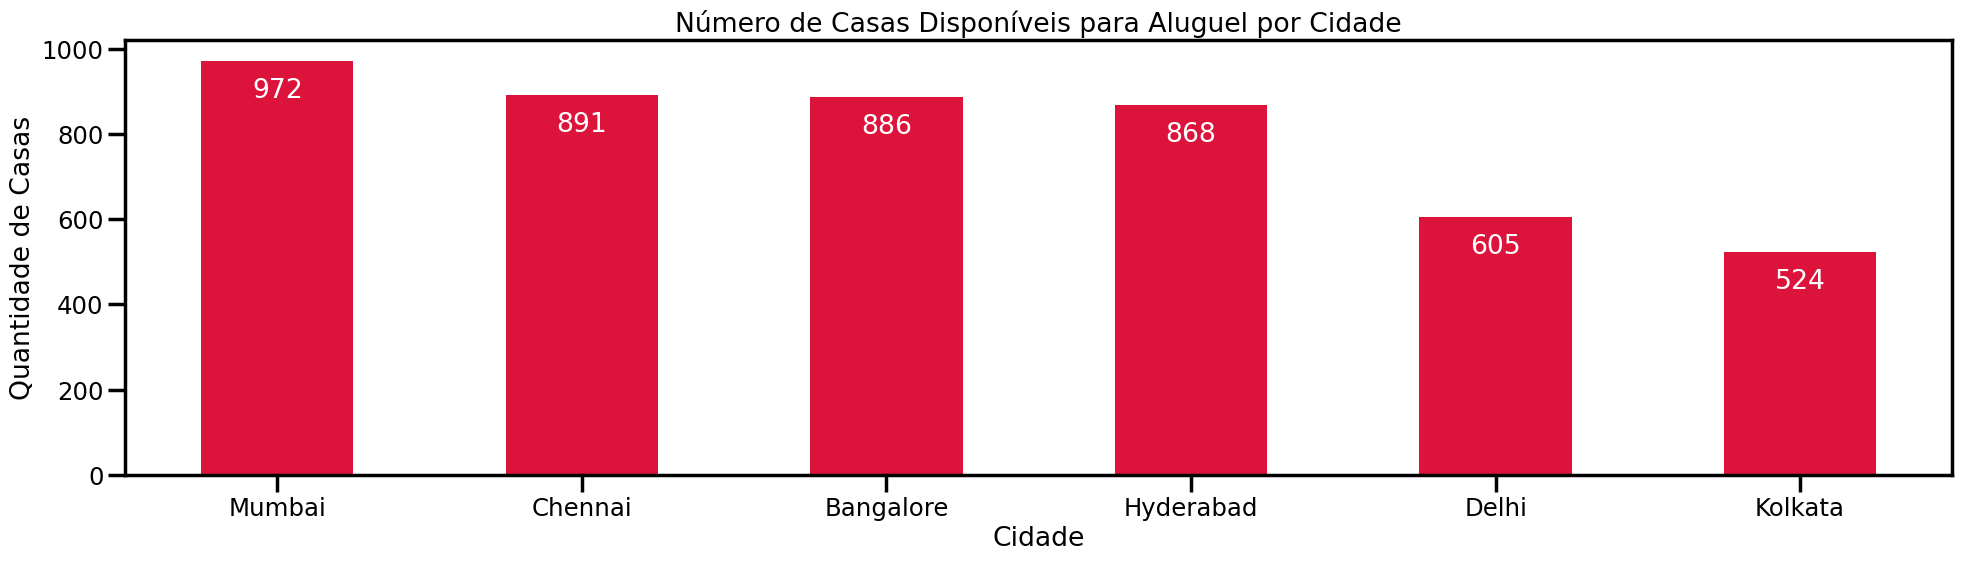

In [9]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')
    

plt.title('Número de Casas Disponíveis para Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

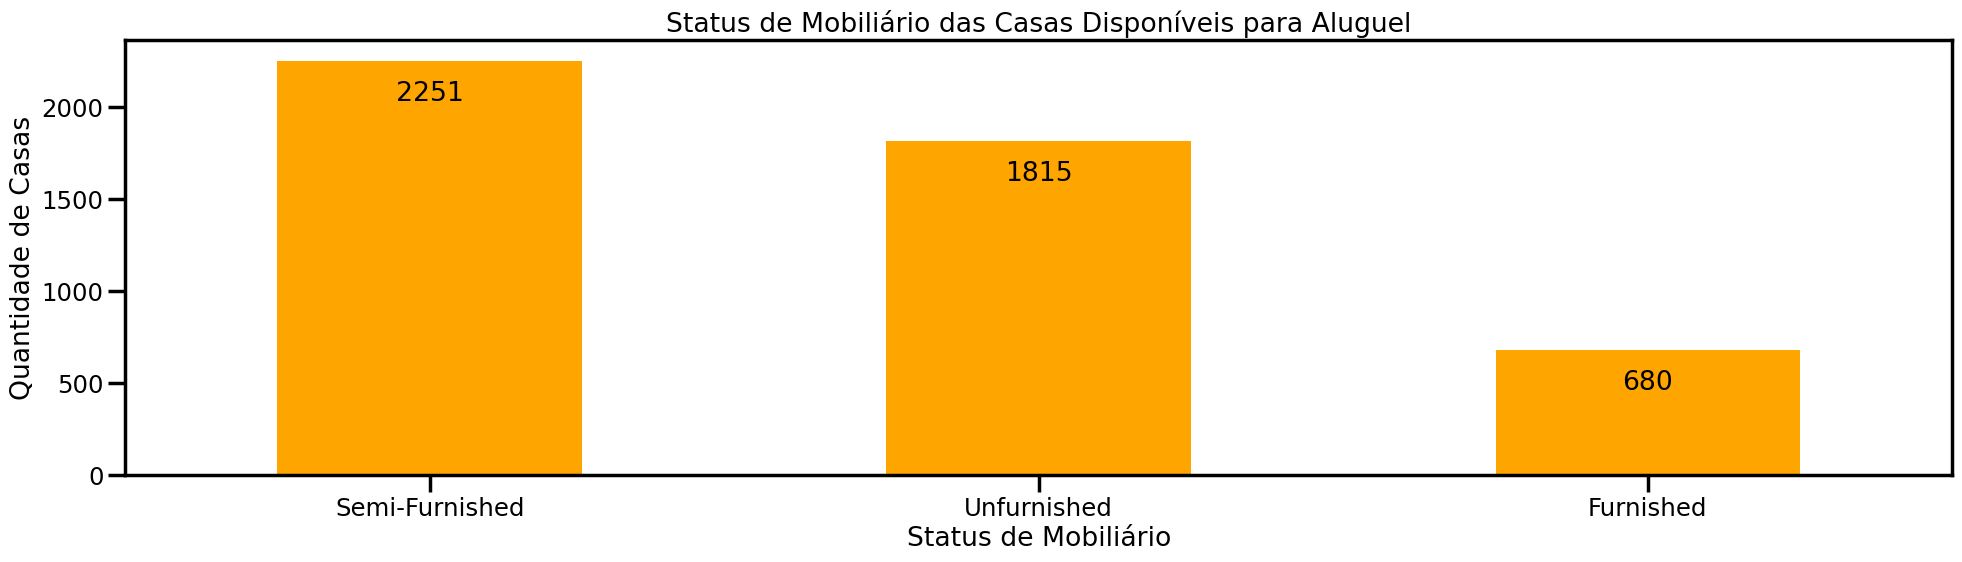

In [10]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Furnishing Status"].value_counts().plot(kind = 'bar',
                                                      color = "Orange",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

plt.title('Status de Mobiliário das Casas Disponíveis para Aluguel')
plt.xlabel('Status de Mobiliário')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

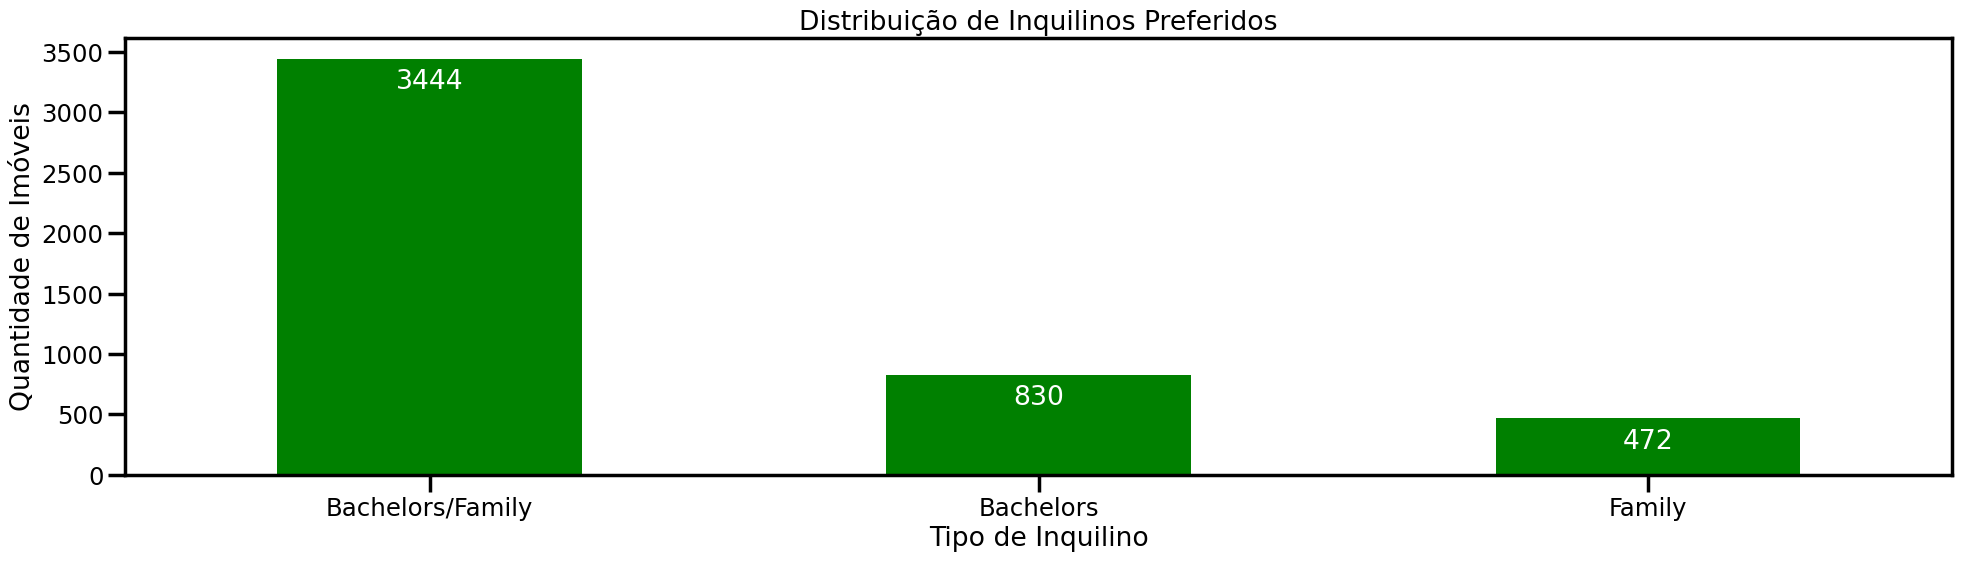

In [11]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                ha = 'center',
                va = 'bottom',
                color = 'White')

plt.title('Distribuição de Inquilinos Preferidos')
plt.xlabel('Tipo de Inquilino')
plt.ylabel('Quantidade de Imóveis')

plt.tight_layout()

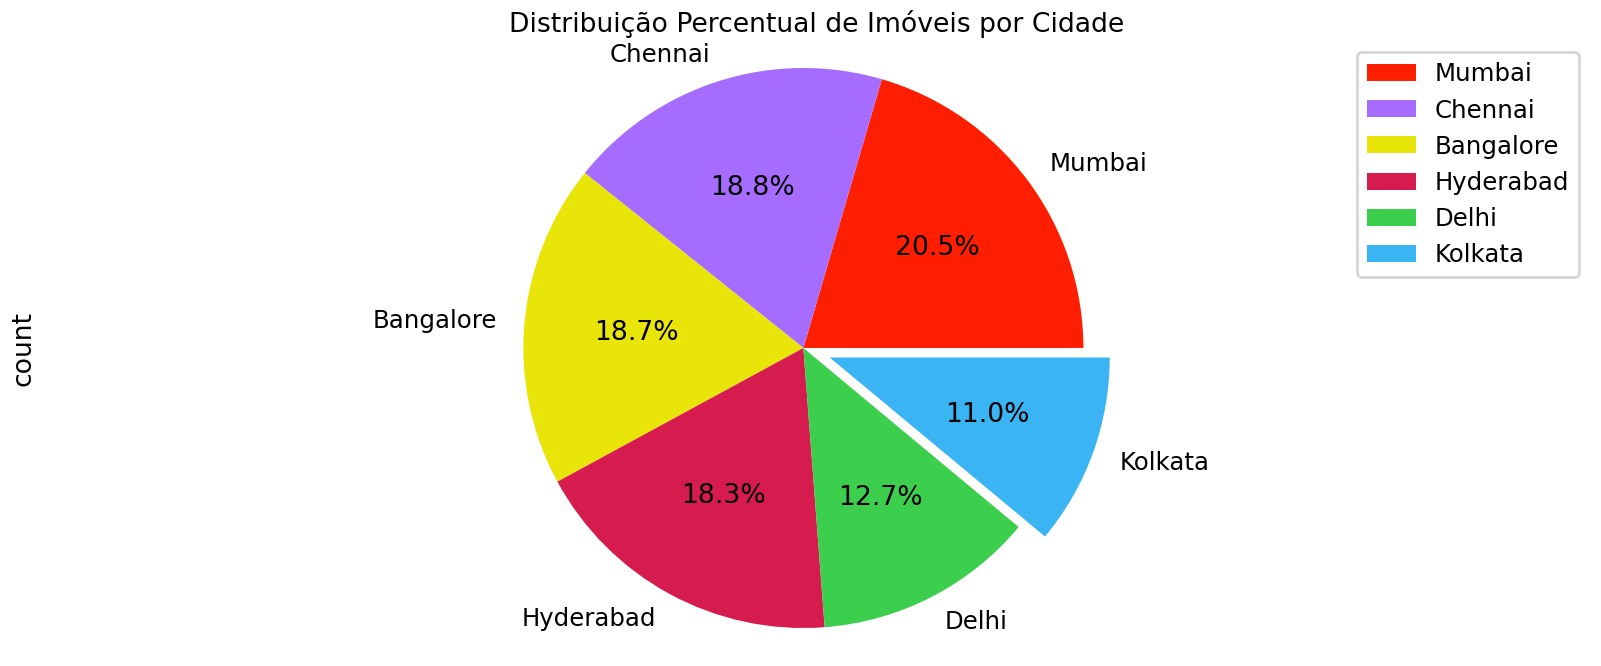

In [12]:
plt.figure(figsize = (20, 8))
counts = dataset["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.title('Distribuição Percentual de Imóveis por Cidade')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

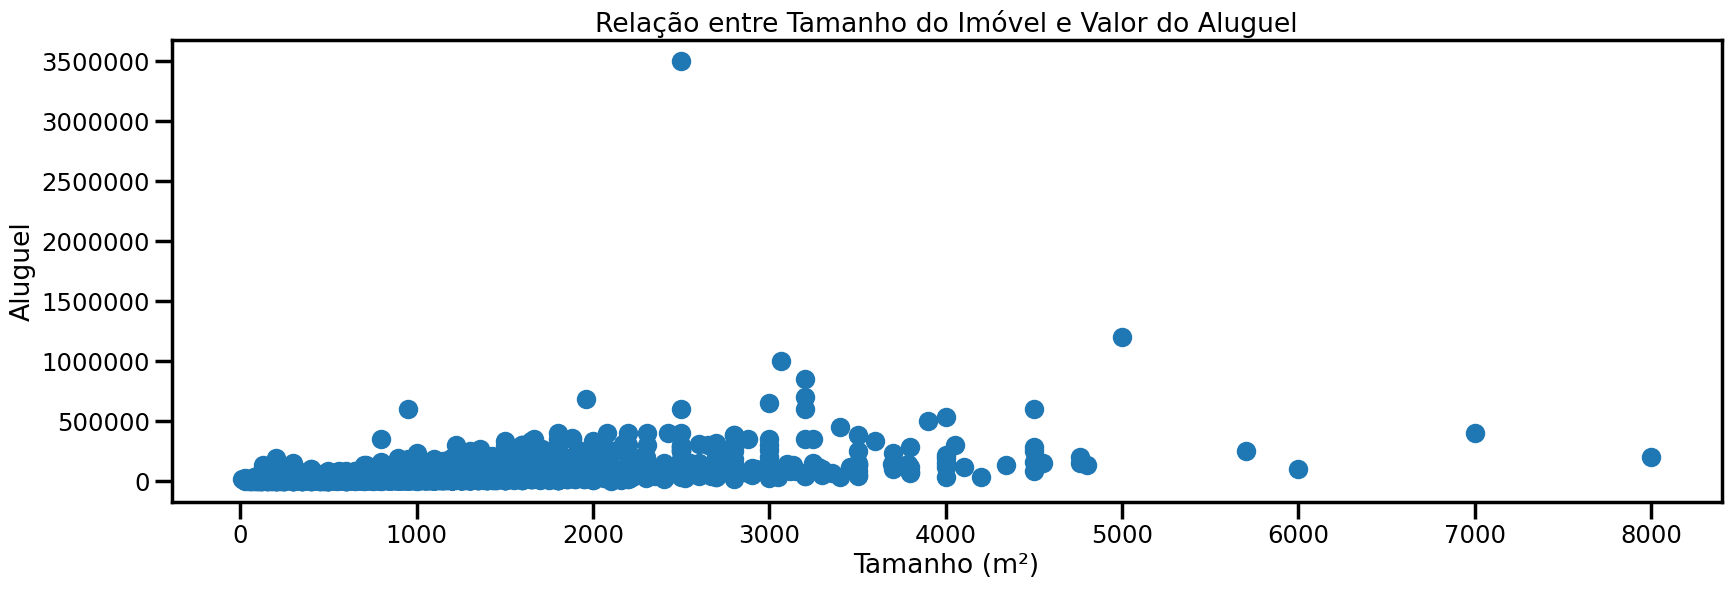

In [13]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(dataset["Size"], dataset["Rent"])
plt.title('Relação entre Tamanho do Imóvel e Valor do Aluguel')
plt.xlabel("Tamanho (m²)")
plt.ylabel("Aluguel");

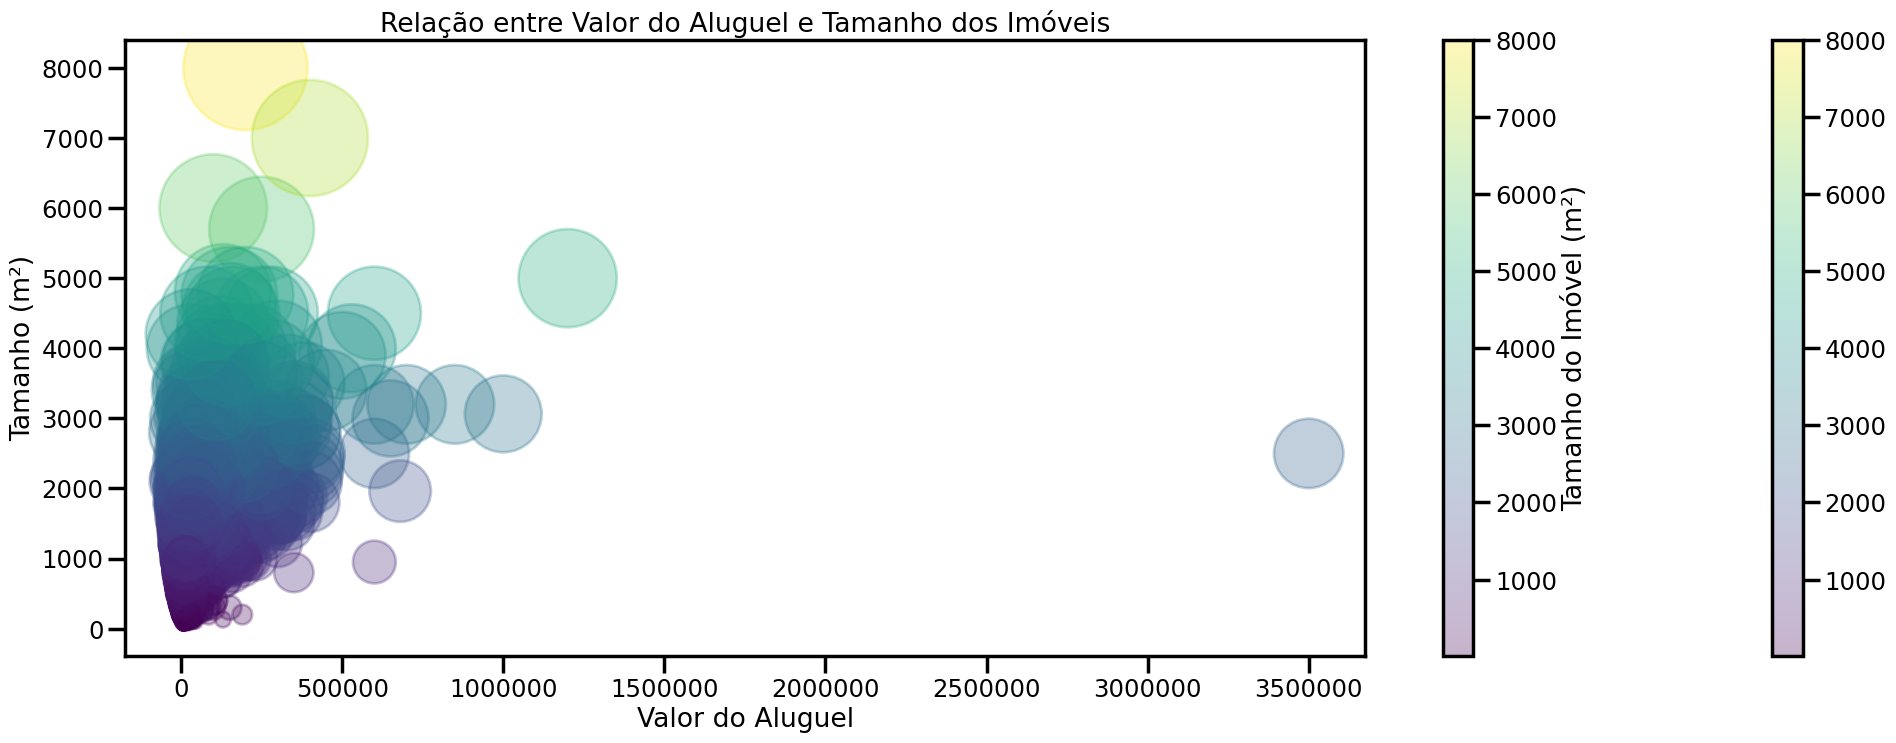

In [14]:
x = dataset["Rent"]
y = dataset["Size"]
colors = dataset["Size"]
sizes = dataset["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

plt.title('Relação entre Valor do Aluguel e Tamanho dos Imóveis')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Tamanho (m²)')
plt.colorbar(label='Tamanho do Imóvel (m²)');

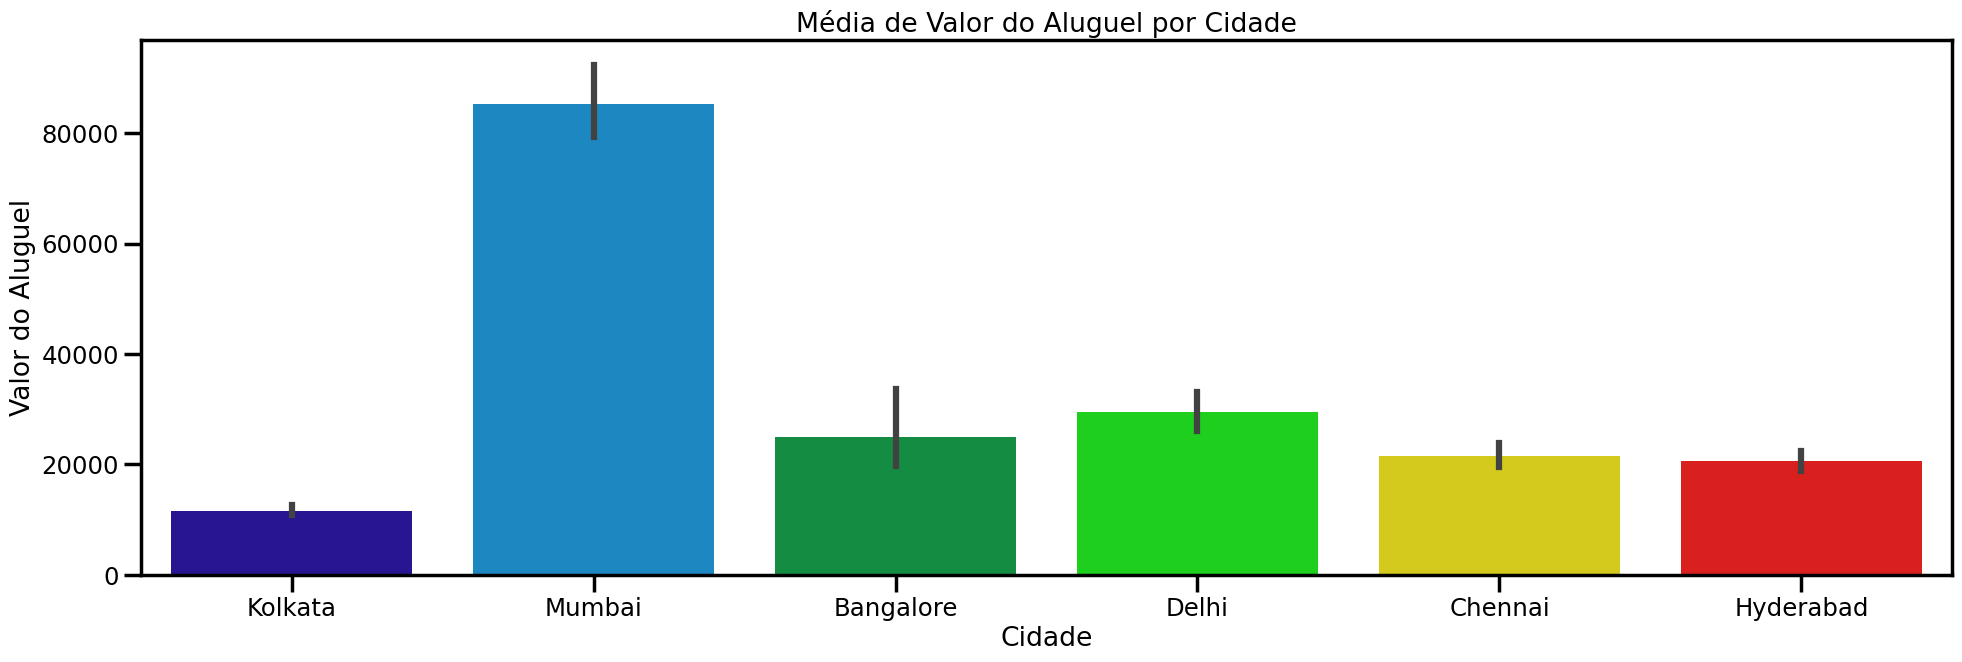

In [15]:
plt.figure(figsize = (20, 7))
sns.barplot(x = dataset["City"], 
            y = dataset["Rent"], 
            hue = dataset["City"],
            palette = "nipy_spectral",
            legend = False);

plt.title('Média de Valor do Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel')
plt.xticks(rotation = 0)
plt.tight_layout()


Text(0, 0.5, 'Frequência')

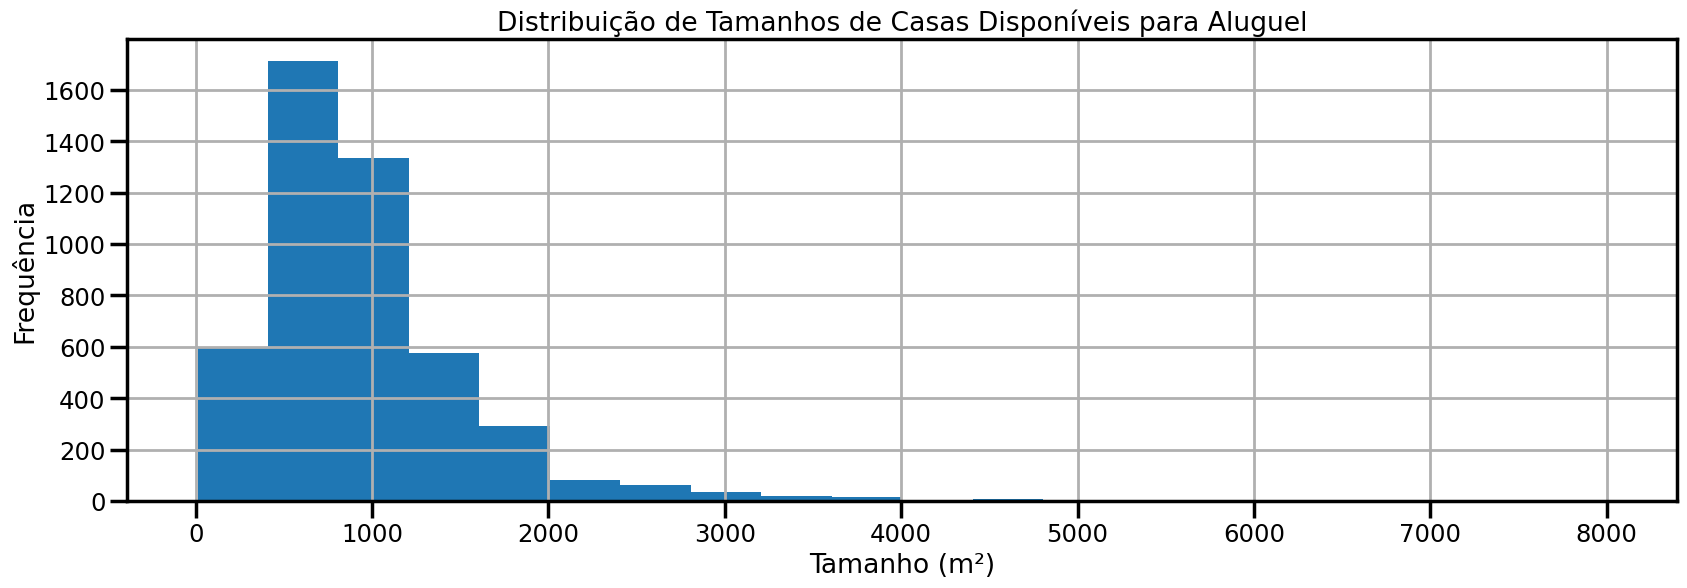

In [16]:

n_bins = 20
plt.figure(figsize = (20, 6))
dataset["Size"].hist(bins = n_bins);

plt.title('Distribuição de Tamanhos de Casas Disponíveis para Aluguel')
plt.xlabel('Tamanho (m²)')
plt.ylabel('Frequência')


Text(0, 0.5, 'Quantidade de Imóveis')

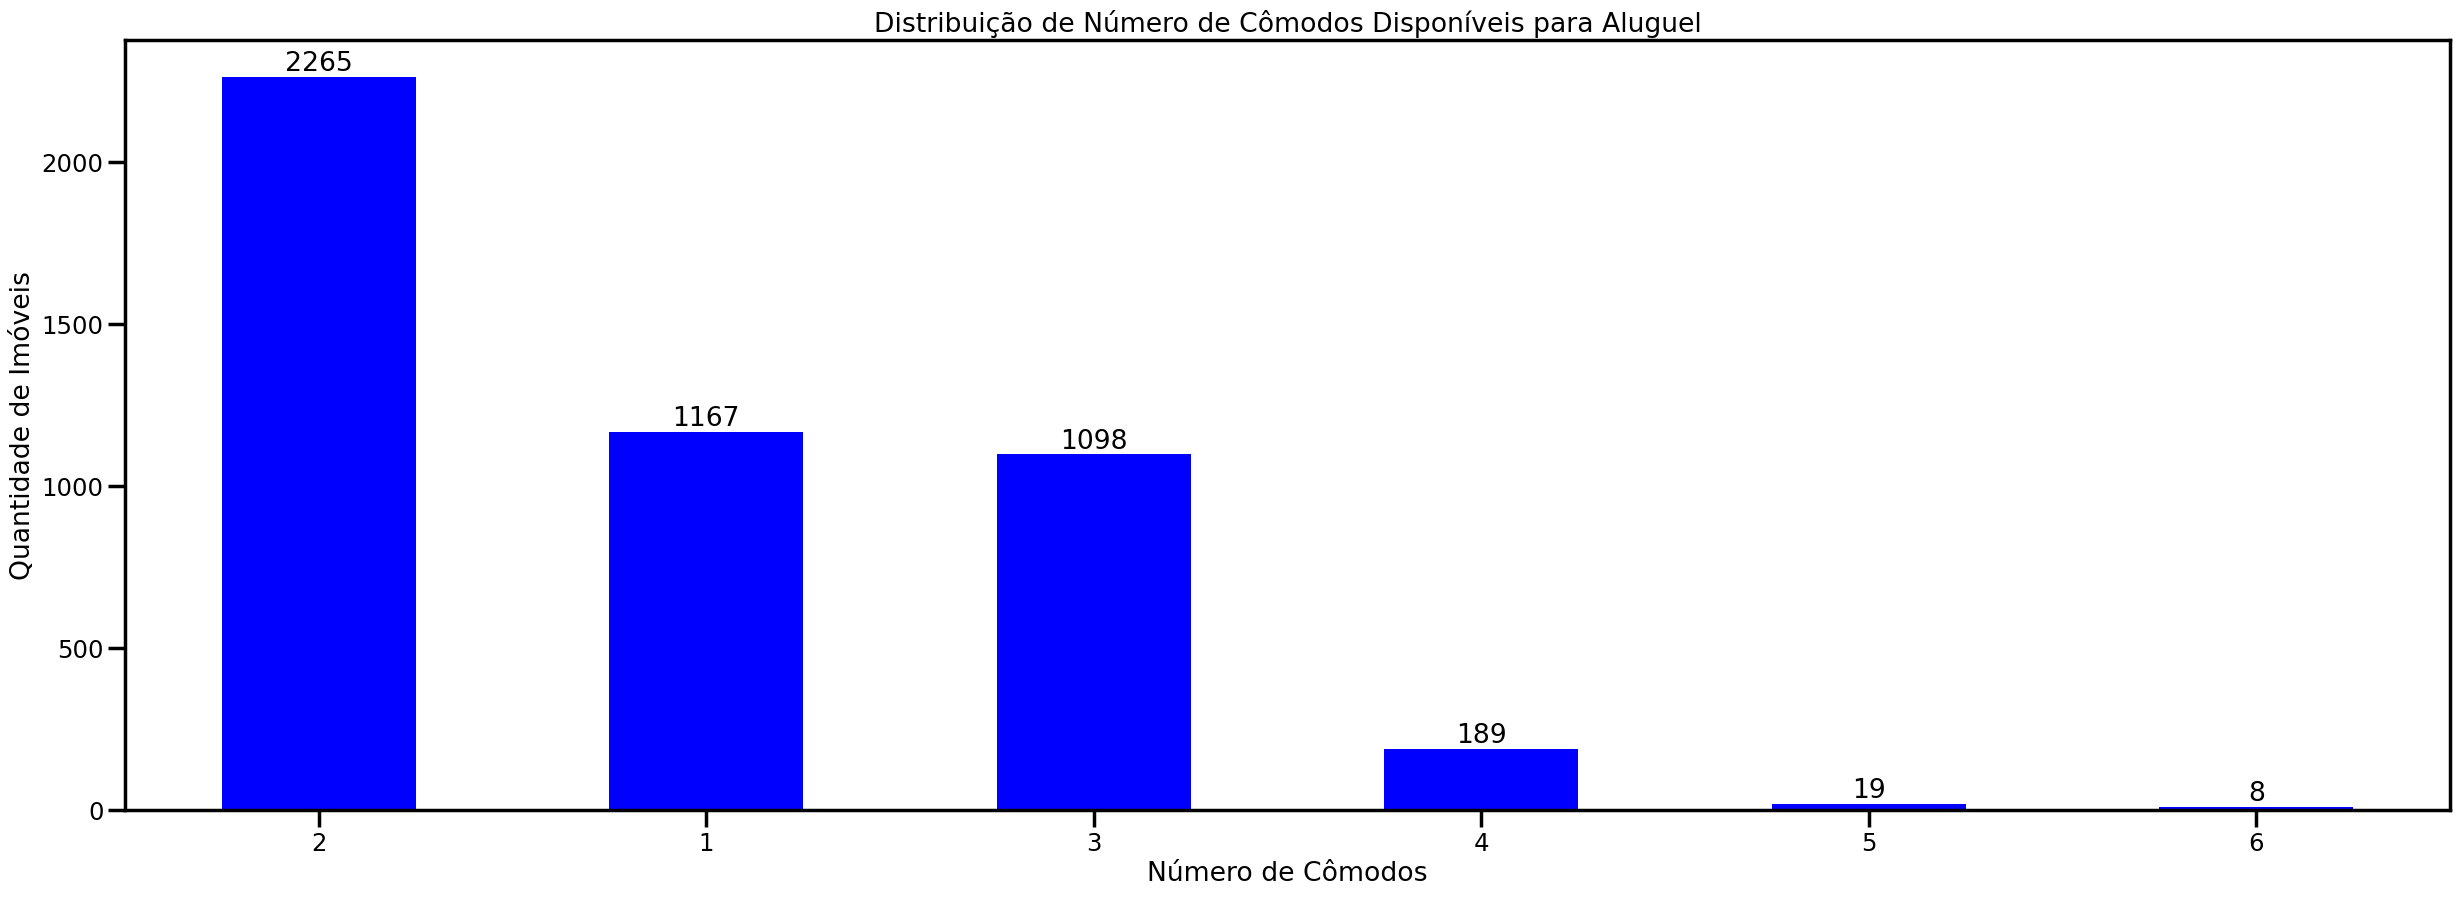

In [17]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["BHK"].value_counts().plot(kind = 'bar',
                                        color = "Blue",
                                        rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Cômodos Disponíveis para Aluguel')
plt.xlabel('Número de Cômodos')
plt.ylabel('Quantidade de Imóveis')

Text(0, 0.5, 'Quantidade de Imóveis')

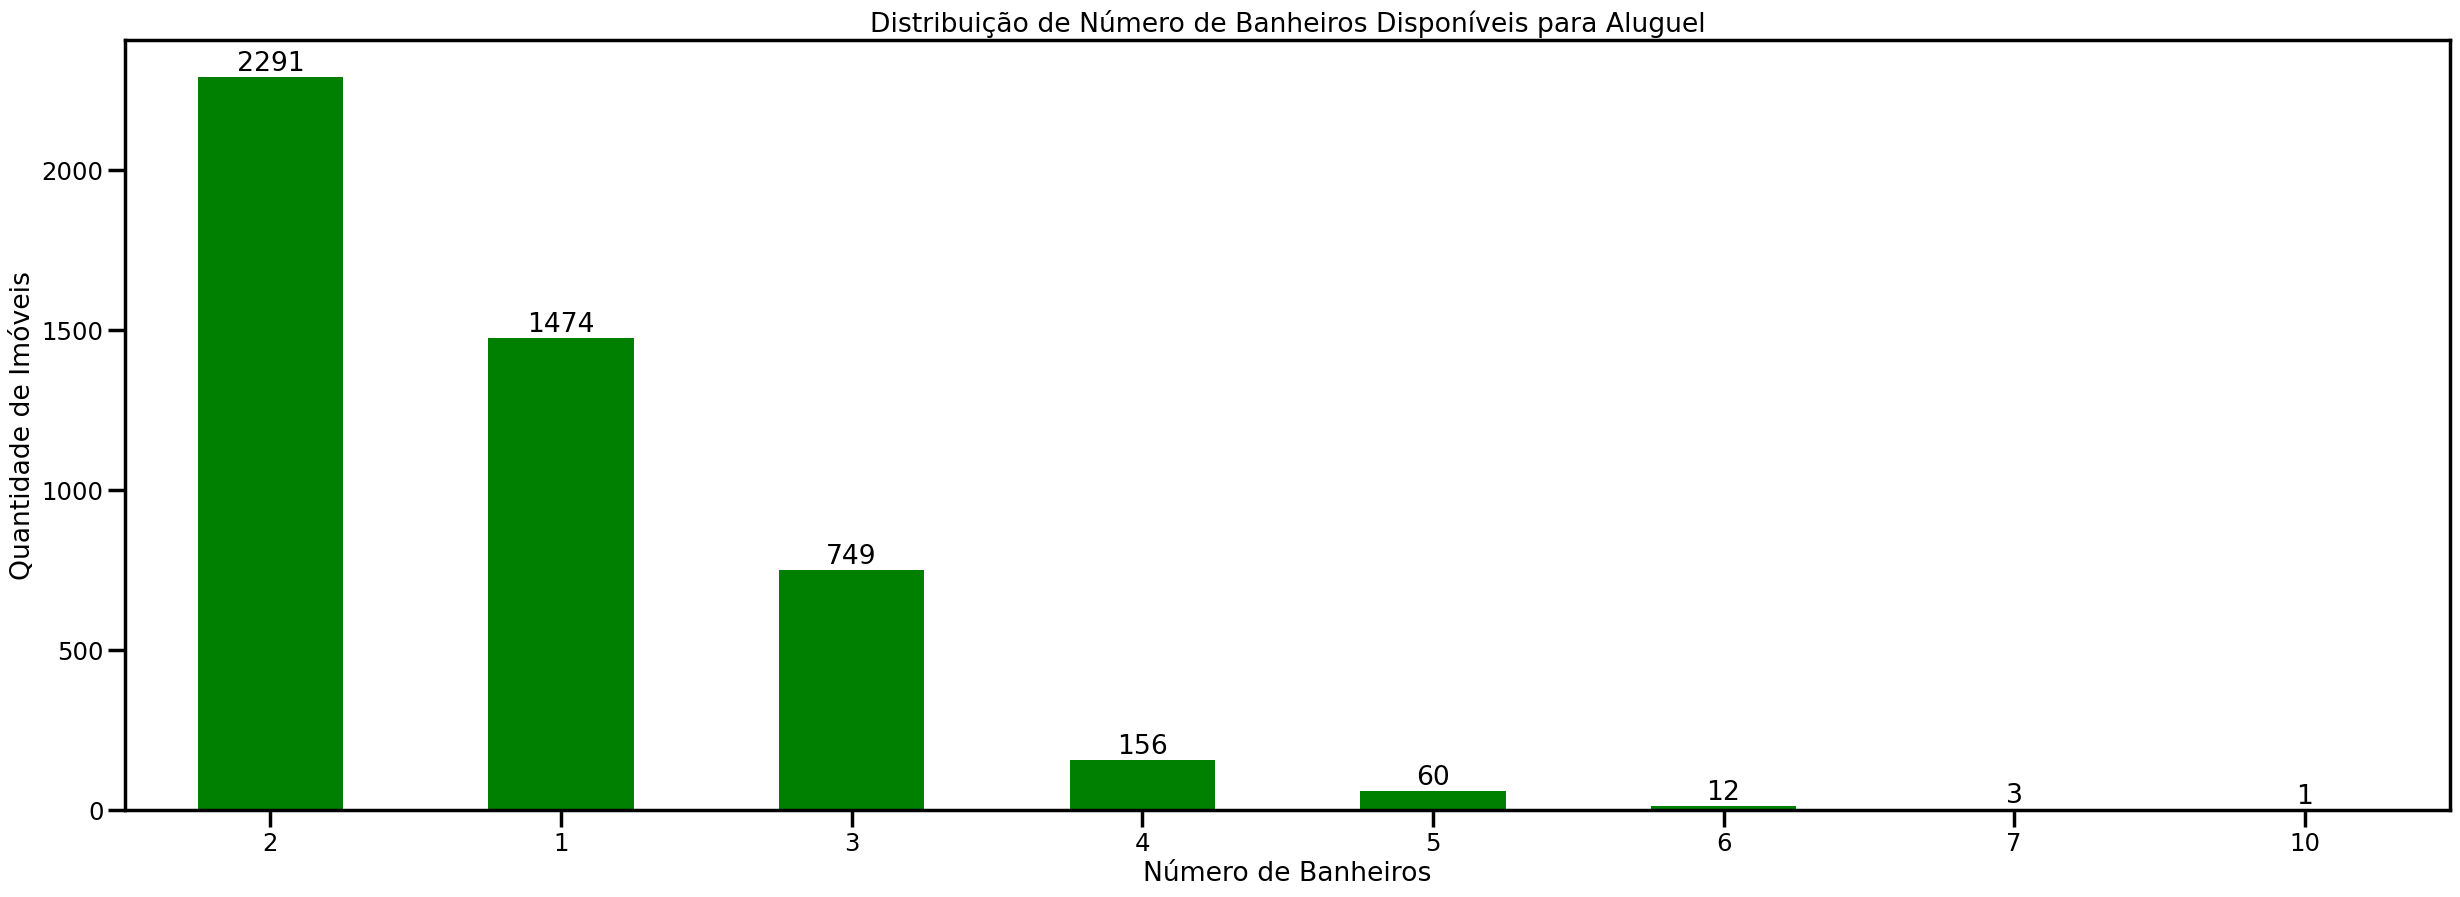

In [18]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["Bathroom"].value_counts().plot(kind = 'bar',
                                             color = "Green",
                                             rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Banheiros Disponíveis para Aluguel')
plt.xlabel('Número de Banheiros')
plt.ylabel('Quantidade de Imóveis')

Text(198.91666666666669, 0.5, 'Número de Cômodos')

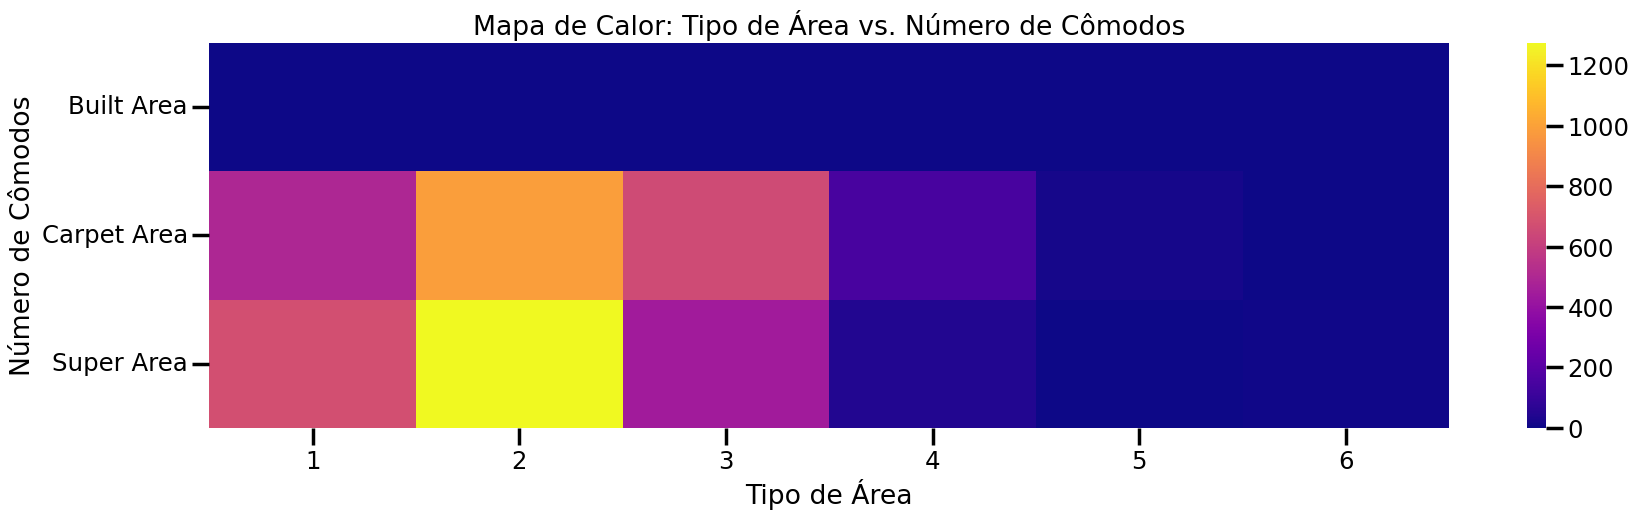

In [19]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(dataset["Area Type"],
                        dataset["BHK"]),
                        cmap = colormap);

plt.title('Mapa de Calor: Tipo de Área vs. Número de Cômodos')
plt.xlabel('Tipo de Área')
plt.ylabel('Número de Cômodos')

### Remoção de outliers


In [20]:
dataset_filtrado = dataset.copy()
print("Número de linhas antes da remoção dos outliers:", len(dataset_filtrado))
colunas_para_verificar = ['Rent', 'Size', 'Bathroom', 'BHK']

for col in colunas_para_verificar:
    mean = dataset_filtrado[col].mean()
    std = dataset_filtrado[col].std()

    dataset_filtrado = dataset_filtrado[(dataset_filtrado[col] >= mean - 3*std) & (dataset_filtrado[col] <= mean + 3*std)]

print("Número de linhas após remoção dos outliers:", len(dataset_filtrado))

Número de linhas antes da remoção dos outliers: 4746
Número de linhas após remoção dos outliers: 4573


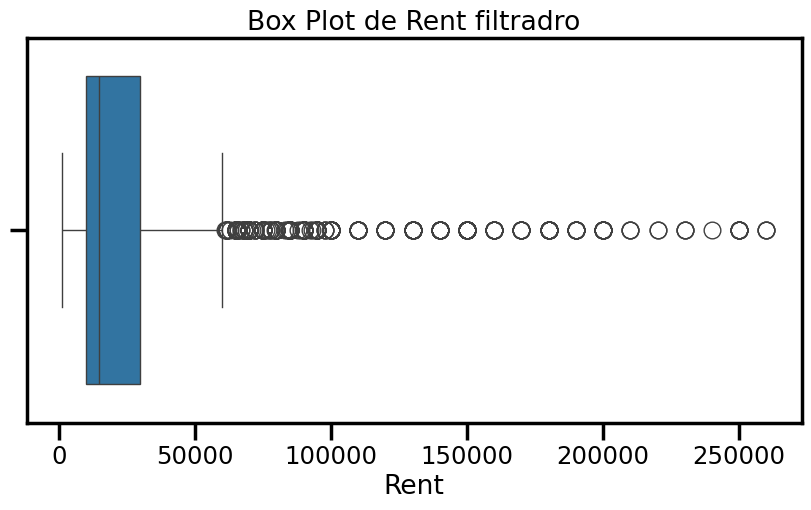

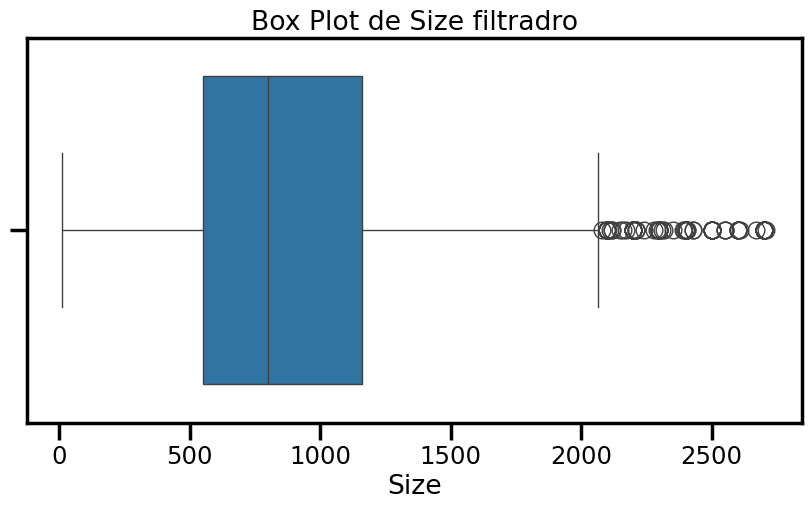

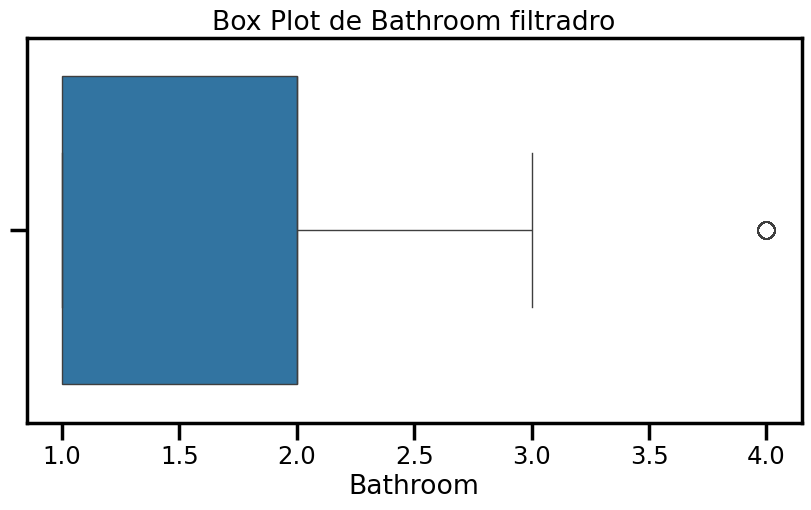

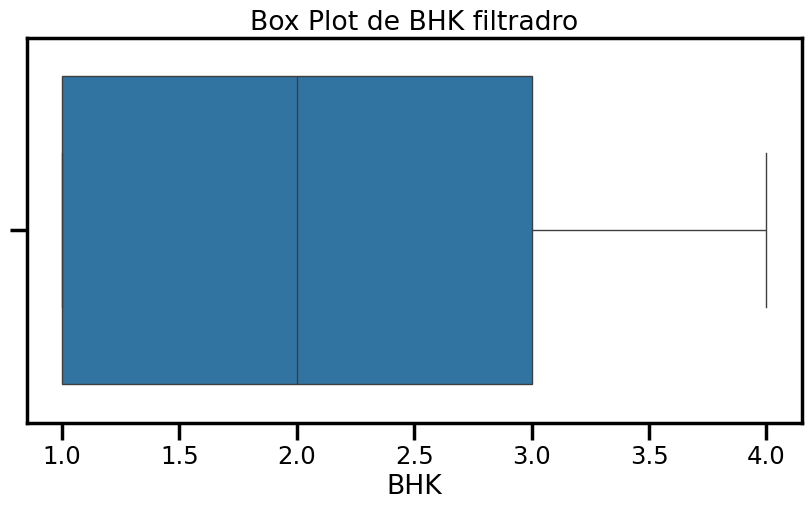

In [21]:
for col in colunas_para_verificar:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = dataset_filtrado[col])
    plt.title(f'Box Plot de {col} filtradro')
    plt.xlabel(col)
    plt.show()


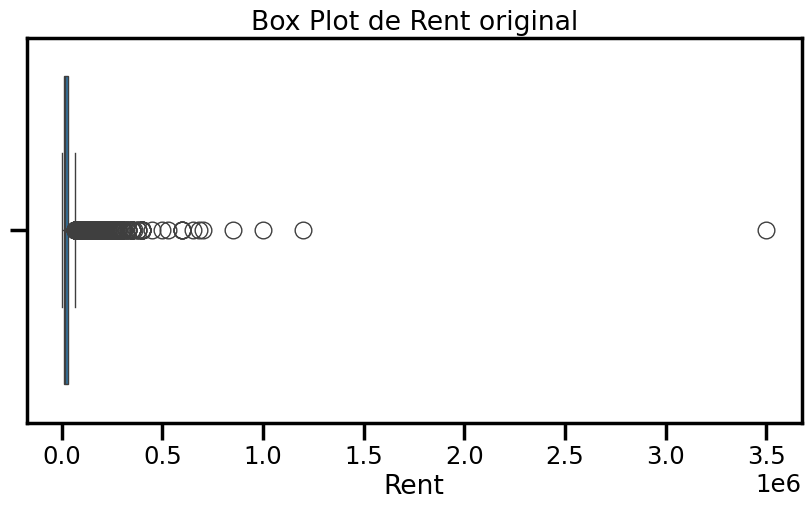

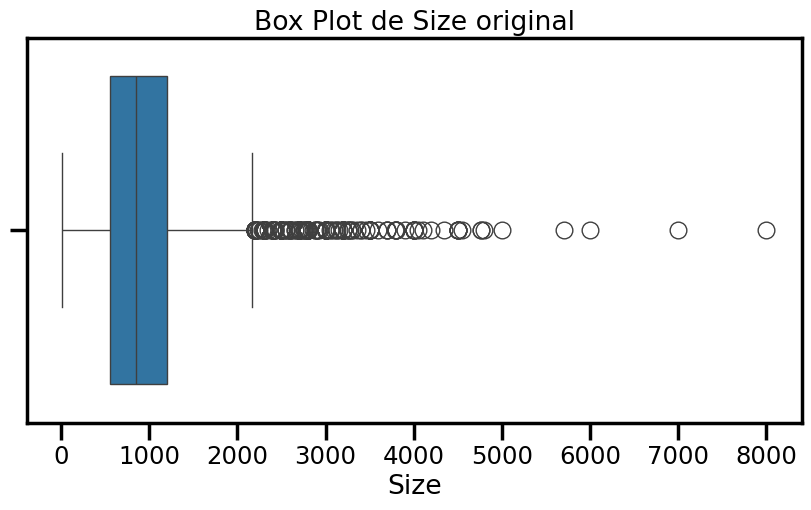

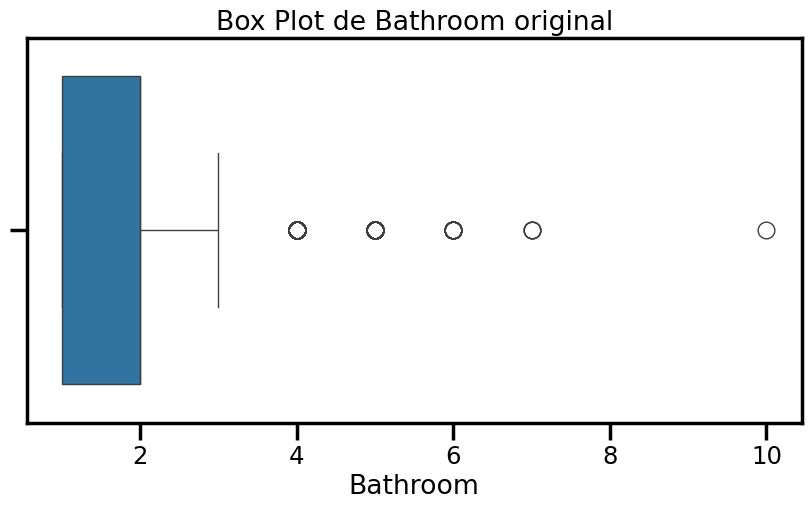

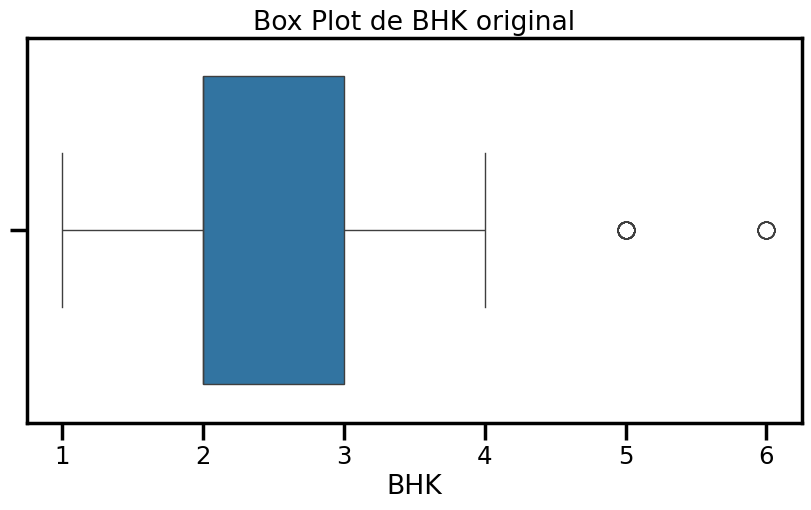

In [22]:
for col in colunas_para_verificar:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = dataset[col])
    plt.title(f'Box Plot de {col} original')
    plt.xlabel(col)
    plt.show()

### Transformação

In [23]:
colunas_categoricas = ['City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'Area Type']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

encoded_features = pd.DataFrame(
    ohe.fit_transform(dataset[colunas_categoricas]).toarray(),
    columns=ohe.get_feature_names_out(colunas_categoricas),
    index=dataset.index
)

dataset_transformado = pd.concat([dataset, encoded_features], axis=1)

dataset_transformado.drop(columns=colunas_categoricas, inplace=True)
dataset_transformado.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Area Type_Carpet Area,Area Type_Super Area
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [24]:
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### Matriz de confusão

In [ ]:
plt.figure(figsize=(100, 75))

numeric_cols = dataset_transformado.select_dtypes(include=['float64', 'int64']).columns

dataset_int = dataset_transformado.copy()
for col in numeric_cols:
    dataset_int[col] = dataset_int[col].astype(int)

corr_matrix = dataset_int[numeric_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de correlação", fontsize=100, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=60) 
plt.yticks(fontsize=60) 

plt.tight_layout()
plt.show()

# Aplicação dos modelos

In [49]:
X = dataset_int.drop(columns=['Rent', 'Posted On', 'Floor', 'Area Locality'])
y = dataset_int['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão linear

In [50]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)
print(f"R² do modelo de regressão linear: {linear_score:.2f}")
pred_train = linear_model.predict(X_train)
pred_test = linear_model.predict(X_test)
y_train_orig = y_train
y_test_orig = y_test
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig, pred_train)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig, pred_train)}")
print(f"RSQ: {r2_score(y_train_orig, pred_train)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig, pred_train))} mean:{int(dataset_int.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig, pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig, pred_test)}")
print(f"RSQ: {r2_score(y_test_orig, pred_test)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig, pred_test))} mean:{int(dataset_int.Rent.mean())}")

R² do modelo de regressão linear: 0.52
Train
MSE: 4733490577.325435
MAPE: 1.176183328088994
RSQ: 0.2858606111004718
RMSE: 68800.36756679018 mean:34993

Test
MSE: 1911180916.2025692
MAPE: 1.1476714400840362
RSQ: 0.520452181584933
RMSE: 43717.05520963837 mean:34993


## Random Forest 

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"\n\n\nR² do modelo de regressão Random Forest: {rf_score:.2f}")
pred_train_rf = rf_model.predict(X_train)
pred_test_rf = rf_model.predict(X_test)
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig, pred_train_rf)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig, pred_train_rf)}")
print(f"RSQ: {r2_score(y_train_orig, pred_train_rf)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig, pred_train_rf))} mean:{int(dataset_int.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig, pred_test_rf)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig, pred_test_rf)}")
print(f"RSQ: {r2_score(y_test_orig, pred_test_rf)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig, pred_test_rf))} mean:{int(dataset_int.Rent.mean())}")   




R² do modelo de regressão Random Forest: 0.53
Train
MSE: 1021803413.0913119
MAPE: 0.19514665444614163
RSQ: 0.8458410230082701
RMSE: 31965.659903892363 mean:34993

Test
MSE: 1869011049.133426
MAPE: 0.41165533542033467
RSQ: 0.5310333189248988
RMSE: 43232.060431275146 mean:34993
